# 중간고사 대비

- toc:true
- branch: master
- badges: true
- comments: true
- editor : 이강철
- hide : false
- published : true

## 1주차 : 단순선형회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### 온도에 따른 아메리카노 판매량

$$아이스 아메리카노  = \beta_1 \times 온도 + \varepsilon$$

`-` 온도 $\bf{x}$를 아래와 같이 생성

In [ ]:
x = tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

`-` 가정 : 만약 아메리카노 판매량 $\bf{y}$가 아래와 같다고 하자

$$ \bf {y} \approx 10.2 + 2.2 \bf{x}$$

In [ ]:
tf.random.set_seed(202150256)

epsilon = tf.random.normal([10])
y = 10.2 + 2.2*x + epsilon
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.728127, 57.886845, 59.39006 , 63.192116, 63.904133, 63.547157,
       68.00105 , 70.056755, 72.11336 , 78.33952 ], dtype=float32)>

`-` 일상적인 데이터 형식에서 다음과 같이 자료를 모은 셈이다 

In [ ]:
tf.transpose(tf.concat([[x],[y]],0))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 53.728127],
       [22.2     , 57.886845],
       [22.7     , 59.39006 ],
       [23.3     , 63.192116],
       [24.4     , 63.904133],
       [25.1     , 63.547157],
       [26.2     , 68.00105 ],
       [27.3     , 70.056755],
       [28.4     , 72.11336 ],
       [30.4     , 78.33952 ]], dtype=float32)>

### 도식화 

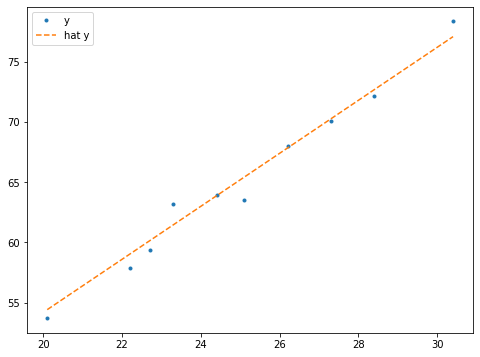

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(x,y,".",label="y")
plt.plot(x,10.2+2.2*x,"--",label ="hat y")
plt.legend()

### 목표

$$loss = \sum (y - \hat {y})^2 $$

* `loss`를 최소화 하는 것이 우리의 목표이다.

* 일일이 $\beta_i$의 값을 집어넣으면 `loss`를 최소화하는 $\beta_i$를 구할 수 있지만 사실상 무한번 저 과정을 반복하는 것은 불가능하다.

* 따라서 위를 각각의 $\beta_i$로 미분하면 다음과 같이 구할 수 있다.

$$\hat {\beta_1} = \frac {S_{xy}}{S_{xx}}  = \frac {\sum (x-\bar x)(y-\bar y)}{\sum {(x-\bar x)^2}}$$

$$\hat {\beta_0} =  \bar y - \hat {\beta_1}\bar x $$

In [ ]:
import numpy as np

In [ ]:
Sxx = sum((x- np.mean(x))**2)
Sxy = sum((x-np.mean(x))*(y-np.mean(y)))

In [ ]:
hat_b1 = Sxy/Sxx
hat_b0 = np.mean(y) - hat_b1*np.mean(x)

In [ ]:
hat_b1,hat_b0

(<tf.Tensor: shape=(), dtype=float32, numpy=2.311769>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.198574>)

`-` 위의 그래프와 비교해보자

* $y$ : 실제 값
* $\hat {y_1}$ : 우리가 일전에 가정한 것(세상의 법칡)
* $\hat {y_2}$ : 미분으로 구한 베타 추정치

$$\hat {y_1} = 10.2 + 2.2 x$$

$$\hat  {y_2} = \hat {\beta_{0,2}} + \hat {\beta_{1,2}} \times x $$

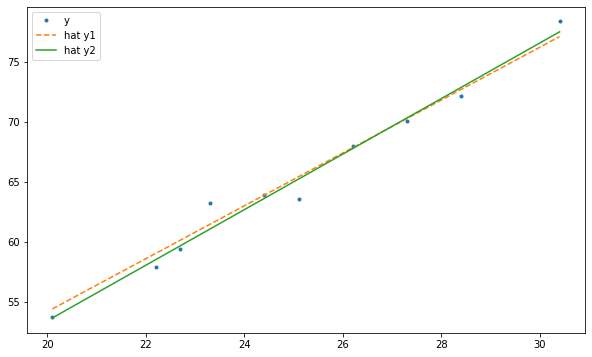

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(x, y,".", label = "y")
plt.plot(x, 10.2+2.2*x,"--", label = "hat y1")
plt.plot(x, hat_b1*x + hat_b0, label = "hat y2")
plt.legend()

*  여튼 미분을 통해서 $\beta_i$를 추정한다는 것은 수학적 관점에서 꽤나 훌륭한 방법인 것 같다.

* 그러나 만약 $x_i,i = 1,2,\dots 10009$  이런식으로 무수히 많은 변수가 존재할 경우 확장이 어렵고 \beta_i 를 추정하는데 어마어마한 시간이 걸릴 것임

* 이를 행렬구조로 바꾸어서 생각해보자

$$ \bf {y} = \bf {x} \boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

* $\bf {y} \to (n\times 1)$

* $\bf {x} \to  (n \times p), \quad \boldsymbol {\beta} \to (\bf p \times 1), \quad \therefore \quad \bf {x} \boldsymbol{\beta} \to (n \times 1)$

* $\boldsymbol {\varepsilon} \to (\bf n \times 1)$

$$loss = \sum (y- \hat y)^2 = (\bf y - \bf X \boldsymbol {\beta} )^{\top}(\bf y - \bf X \boldsymbol {\beta} ) $$

위를 풀면

$$loss = \bf y^{\top}y - \bf y^{\top}\bf X \boldsymbol{\beta}  -\boldsymbol {\beta}^{\top} \bf {X}^{\top}y + \boldsymbol {\beta}^{\top}\bf{X}^{\top}\bf X \boldsymbol {\beta}$$

위를 미분하여  $loss$를 최소화하는 $\hat {\boldsymbol {\beta}}$를 구하면

$$\hat {\boldsymbol {\beta}} = (\bf {X^{\top} X})^{-1} \bf X^{\top} \bf y$$ 

`-` 이제 직접 코드를 짜서 $loss$를 최소화하는 $\hat {\boldsymbol{\beta}}$를 구해보자

#### 매트릭스를 이용한 베타 추정치 구하기

In [139]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior() ## numpy 처럼 사용하기 위해!

In [144]:
x = tf.constant([20.1,22.2,22.7,23.3,24.4,25.1,26.2,27.3,28.4,30.4])
epsilon = tf.random.normal([10])
y = 10.2 + 2.2*x + epsilon
n = len(x)

In [145]:
X = tf.concat([[[1.0]*n],[x]],0).T

In [146]:
X

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]], dtype=float32)>

In [148]:
print(tf.linalg.inv(X.T @ X) @ X.T @ y)

tf.Tensor([9.045627  2.2322702], shape=(2,), dtype=float32)


* 값이 좀 다르긴 한데 이는 텐서플로우가 계산을 대충하는 것임

* 실제로 정확한 계산을 위해  `tensorflow` 안에 내장된 `nummpy`를 이용하자

#### tensorflow의 정확한 계산을 위해!

In [149]:
import tensorflow.experimental.numpy as tnp

In [150]:
x = tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])
y = 10.2 + 2.2 *x +epsilon

In [154]:
Sxx = sum((x-np.mean(x))**2)
Sxy = sum((x-np.mean(x))* (y-np.mean(y)))
beta1 =  Sxy/Sxx
beta0 = np.mean(y) - beta1*np.mean(x)

In [155]:
[beta0,beta1]

[<tf.Tensor: shape=(), dtype=float64, numpy=9.045680157770313>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.2322740618055756>]

In [162]:
X = tnp.concatenate([[[1.0]*n],[x]]).T
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([9.04568016, 2.23227406])>

***

## Extra 

$$L = loss = (\bf y  -\bf X \boldsymbol{\beta})^{\top}(\bf y  -\bf X \boldsymbol{\beta})$$

* 위를 실제로 미분하여 수식을 써보장

$L = \bf y^{\top}y - \bf y^{\top} \bf X \boldsymbol{\beta} - \boldsymbol {\beta}^{\top} \bf X^{\top}y + \boldsymbol {\beta}^{\top} \bf X^{\top}X \boldsymbol {\beta}$

기억하자 

벡터든, 메트릭스든 $\frac {\partial}{\partial {x}}x^{\top}$는 $\bf I$ 가 성립한다.

### 벡터 미분

`1`. $\,\,\bf y^{\top}y = \sum y^{2}$

$\bf {y} \to (n \times 1), \quad \bf {y}^{\top} \to (1 \times n)$

$\bf y^{\top}y = \sum y^{2}\to (1\times 1)$ 이므로

$$\therefore \quad \frac {\partial \sum y^2}{\partial \boldsymbol {\beta}} = 0$$

`2`.  $\bf y^{\top} X \boldsymbol {\beta}$ 

$\bf y^{\top} X \boldsymbol {\beta} \to (1\times n)\, (n\times p)\, (p \times 1) = (1 \times 1) $ 이는

$(\bf y^{\top} X \boldsymbol {\beta})^{\top} = \boldsymbol{\beta}^{\top} \bf X^ {\top} \bf y  $ 를 의미한다

따라서

$$\frac {\partial }{\partial \boldsymbol \beta} \left (\boldsymbol {\beta}^{\top}\bf X^{\top}\bf y\right )= \bf X^{\top}\bf y$$

`3`. $\boldsymbol {\beta}^{\top} \bf {X}^{\top} \bf {X} \boldsymbol {\beta}$

알아야할 것 2

$\frac {\partial}{\partial y} y^{\top}y \neq = \bf I y$ 가 성립한다.


because !!

$y^{\top}y= y_1^{2} + y_2^{2}\dots y_n^{2}$ 이고

$\partial \, \bf y = [\,\partial y_1,\dots \partial y_n \,]$ 이므로 $(n \times 1) \times (1\times 1) \to (n\times 1)$이 성립한다.

따라서 위 같은 경우 $\frac {\partial}{\partial y} y^{\top}y= 2\bf y$ 이다.

이를 아래와 같이 표현할 수 있다.

$f(y) =  y^{\top}y,\quad g(y) = y^{\top}y$ 

$\frac {\partial }{\partial y} \left \{\, (f(y)+ g(y)\,\right \} = \frac {\partial}{\partial y} f(y) +\frac {\partial}{\partial y} g(y)$가 성립!

어렵게 썼지만 2번 미분한다고 생각하자!!

다시 돌아와서 아래식을 2번 미분하면? 

$\boldsymbol {\beta}^{\top} \bf X^{\top}\bf X \boldsymbol {\beta}   = \bf X^{\top}\bf X \boldsymbol {\beta} + \bf X^{\top}\bf X \boldsymbol {\beta}  = 2 \bf X^{\top}\bf X \boldsymbol {\beta}  $

$\frac {\partial}{\partial \boldsymbol {\beta}} L = 0 -2\bf X ^{\top}\bf y  + 2\bf X^{\top}\bf X \boldsymbol {\beta} =0$

$\bf X^{\top} \bf y = \bf X ^{\top}X \boldsymbol {\beta}$ 이므로

$$\hat {\boldsymbol {\beta}} = \left (  \bf X ^{\top}X\right )^{-1}\bf X^{\top}\bf y$$

***

## 2주차 : Tensorflow 

In [1]:
import tensorflow as tf
import numpy as np

`-` tensoflow의 CPU 연결법

In [2]:
tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### tf.constant

`-` 리스트

In [4]:
lst = list(range(6))
lst

[0, 1, 2, 3, 4, 5]

`-` 중첩 리스트 (2 x 2) 

In [6]:
lst = [[1,2],[3,4]]
lst

[[1, 2], [3, 4]]

`-` 중첩 리스트 (4 x 1)

In [10]:
lst = [[1],[2],[3],[4]]
lst

[[1], [2], [3], [4]]

`-` 중첩 리스트 (1 x 4)

In [15]:
lst = [list([1,2,3,4])]
lst

[[1, 2, 3, 4]]

### tensorflow의 변수 선언

#### 스칼라

In [16]:
tf.constant(3.14)

<tf.Tensor: shape=(), dtype=float32, numpy=3.14>

In [18]:
tf.constant(3.14) + tf.constant(3.14)

<tf.Tensor: shape=(), dtype=float32, numpy=6.28>

#### 벡터

In [19]:
vector = tf.constant([1,2,3])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

#### 매트릭스

In [21]:
matrix = tf.constant([[1,0],[0,1]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 0],
       [0, 1]], dtype=int32)>

#### 3차원 이상의 배열

In [22]:
np.array( [[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]]])

array([[[ 0,  1,  1],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]]])

In [27]:
tf.constant([[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]]])

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  1],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]]], dtype=int32)>

In [28]:
tf.constant([[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]],[[0,1,2],[1,2,-1]]])

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  1],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]]], dtype=int32)>

In [24]:
type(tf.constant([[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]]]))

tensorflow.python.framework.ops.EagerTensor

`EagerTensor`가 나오는 것을 기억하자

#### 인덱싱

In [33]:
matrix  = tf.constant([[[0,1,1],[1,2,-1]], [[0,1,2],[1,2,-1]],[[0,1,2],[1,2,-1]]])
matrix

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  1],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]],

       [[ 0,  1,  2],
        [ 1,  2, -1]]], dtype=int32)>

In [36]:
matrix[0][1][2], matrix[0][1][1]

(<tf.Tensor: shape=(), dtype=int32, numpy=-1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

##### tf.constant의 단점

`-` 모든 원소의 데이터 타입이 동일해야하고, 데이터 타입의 묵시적 변환이 불가능하다.

`-` 원소 수정이 불가능함

In [37]:
a = tf.constant([1,2])
a

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [38]:
a[0]

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [39]:
a[0] =11

TypeError: ignored

### tf.constant -> 넘파이 

In [40]:
np.array([tf.constant(1)])

array([1], dtype=int32)

In [41]:
a = tf.constant(3.14)
type(a)

tensorflow.python.framework.ops.EagerTensor

In [43]:
a.numpy()

tensorflow.python.framework.ops.EagerTensor

### 연산

#### 더하기 

In [44]:
a = tf.constant([1,2])
b = tf.constant([3,4])
a+b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [45]:
a+b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [46]:
tf.add(a,b)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

#### 곱하기

`-` 아래값을 살펴보면 우리가 일반적으로 원하는 행렬 연산이 수행되지 않는다

In [47]:
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[5,6],[7,8]])

In [48]:
a*b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 5, 12],
       [21, 32]], dtype=int32)>

`-` 아래와 같은 연산자를 이용하자

In [50]:
a@b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

In [51]:
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

#### 역행렬

`-` 초기 매트릭스를 `int`로 설정할 경우 역행렬 연산이 수행되지 않는다.

In [52]:
tf.linalg.inv(a)

InvalidArgumentError: ignored

In [54]:
a = tf.constant([[1,2],[3,4]], dtype=float)
tf.linalg.inv(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-2. ,  1. ],
       [ 1.5, -0.5]], dtype=float32)>

`-` 위와 같이 `dtype`을 실수로 설정해야 역행렬 연산이 가능하다

#### 행렬식 (determinant) 계산 

In [55]:
tf.linalg.det(a)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

#### Trace(대각합) 계산

In [56]:
tf.linalg.trace(a)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

### 형태변환

#### 2 x 2

In [63]:
a = tf.constant(range(1,5))
a

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [64]:
tf.reshape(a,(2,2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [68]:
temp = tf.reshape(a,(2,2,1))
temp

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

#### 다차원의 적용 

In [70]:
a = tf.constant(range(1,13))
a

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

In [71]:
tf.reshape(a,(2,2,3))

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

In [79]:
tf.reshape(a,(2,2,-1))

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

In [72]:
tf.reshape(a,(4,3))

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [78]:
tf.reshape(a,(4,-1)) ## 이거는 난 죽어도 안쓸 것 같으니 알아만 두자

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [81]:
b = tf.reshape(a,(2,2,-1))
b

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

In [83]:
tf.reshape(b,-1)

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

In [84]:
c = tf.reshape(a,(4,-1)) ## 이거는 난 죽어도 안쓸 것 같으니 알아만 두자
c

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [85]:
tf.reshape(c,-1)

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

### 선언고급

* 리스트나 넘파이로 만들고 `output` 을 `tensor`로 변경하는 것도 좋은 방법이다.

In [86]:
l = list(range(1,5))
l

[1, 2, 3, 4]

In [87]:
tf.constant(l)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [88]:
tf.constant(np.diag(l))

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])>

#### tf.zeros, tf.ones 

`-` 같은 방법이지만 `dtype`이 달라짐을 주의하자

In [89]:
tf.zeros([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [91]:
tf.reshape(tf.constant([0]*9),[3,3])

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)>

In [90]:
tf.ones([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [92]:
tf.reshape(tf.constant([1]*9),[3,3])

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int32)>

In [95]:
tf.linspace(0,1,10)

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])>

### tf.concat 쌉중요

#### 저차원 행렬 

`step.1` (2 x 1) 행렬 생성 

In [97]:
a = tf.constant([[1],[2]])
b = tf.constant([[3],[4]])
a,b

(<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
 array([[1],
        [2]], dtype=int32)>, <tf.Tensor: shape=(2, 1), dtype=int32, numpy=
 array([[3],
        [4]], dtype=int32)>)

`step.2` (1 x 2) + (1 x 2) $\to$ (2 x 2) or (1 x 4)

In [105]:
tf.concat([a,b],axis=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 3],
       [2, 4]], dtype=int32)>

In [106]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
array([[1],
       [2],
       [3],
       [4]], dtype=int32)>

In [112]:
a = tf.constant([[1,2]])
b = tf.constant([[3,4]])
a,b

(<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[3, 4]], dtype=int32)>)

In [113]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [114]:
tf.concat([a,b],axis=1)

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 2, 3, 4]], dtype=int32)>

#### 고차원 행렬 (2 x 2 x 3)

`-` 내 생각 1 : 다차원의 경우 기존 `n x p` 의 케이크를 썬다고 생각하자

`-` 내 생각 2 : `tf.concat`에서 다차원의 경우 `axis` 값이 늘어날 수록 차원은 저차원으로 간다고 생각하자

In [147]:
a = tf.reshape(tf.constant(range(12)),(2,2,3))
b = -a

`-` 즉, 아래 `a`는 `4 x 3`행렬을 `2 x 2 x 3`으로 쪼갠 것이다.

In [153]:
tf.reshape(tf.constant(range(12)),(4,3))

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]], dtype=int32)>

In [154]:
a

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]], dtype=int32)>

In [155]:
a.shape

TensorShape([2, 2, 3])

In [156]:
temp = tf.concat([a,b],axis=0)

In [157]:
temp.shape

TensorShape([4, 2, 3])

In [159]:
temp

<tf.Tensor: shape=(4, 2, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5]],

       [[  6,   7,   8],
        [  9,  10,  11]],

       [[  0,  -1,  -2],
        [ -3,  -4,  -5]],

       [[ -6,  -7,  -8],
        [ -9, -10, -11]]], dtype=int32)>

In [160]:
temp = tf.concat([a,b],axis=1)

In [161]:
temp.shape

TensorShape([2, 4, 3])

In [162]:
temp

<tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5],
        [  0,  -1,  -2],
        [ -3,  -4,  -5]],

       [[  6,   7,   8],
        [  9,  10,  11],
        [ -6,  -7,  -8],
        [ -9, -10, -11]]], dtype=int32)>

In [163]:
temp = tf.concat([a,b],axis=2)

In [164]:
temp.shape

TensorShape([2, 2, 6])

In [165]:
temp

<tf.Tensor: shape=(2, 2, 6), dtype=int32, numpy=
array([[[  0,   1,   2,   0,  -1,  -2],
        [  3,   4,   5,  -3,  -4,  -5]],

       [[  6,   7,   8,  -6,  -7,  -8],
        [  9,  10,  11,  -9, -10, -11]]], dtype=int32)>

#### 주의할 거

`-` 차원이 `(n,)` 이런식으로 되어있을 경우

In [168]:
a = tf.constant (range(4))
b = -a

In [169]:
a.shape

TensorShape([4])

In [170]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 0,  1,  2,  3,  0, -1, -2, -3], dtype=int32)>

In [171]:
tf.concat([a,b],axis=1)

InvalidArgumentError: ignored

`-` 위 같은 에러가 안뜨게 하려면

In [175]:
a = tf.constant([list(range(4))])
b=-a

In [176]:
a.shape

TensorShape([1, 4])

In [177]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 0, -1, -2, -3]], dtype=int32)>

In [178]:
tf.concat([a,b],axis=1)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[ 0,  1,  2,  3,  0, -1, -2, -3]], dtype=int32)>

### tf.stack 

#### 저차원의 경우

In [183]:
 a = tf.constant(range(4))
 b = -a

In [185]:
a.shape

TensorShape([4])

In [186]:
tf.stack([a,b],axis=0)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 0, -1, -2, -3]], dtype=int32)>

In [188]:
tf.stack([a,b],axis=1)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[ 0,  0],
       [ 1, -1],
       [ 2, -2],
       [ 3, -3]], dtype=int32)>

#### 고차원의 경우

In [201]:
a = tf.reshape(tf.constant(range(12)),(2,2,3))
b = -a
a.shape

TensorShape([2, 2, 3])

In [202]:
a

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]], dtype=int32)>

In [199]:
temp = tf.stack([a,b],axis=0)
temp.shape

TensorShape([2, 2, 2, 3])

In [203]:
temp

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  3,   4,   5]],

        [[  6,   7,   8],
         [  9,  10,  11]]],


       [[[  0,  -1,  -2],
         [ -3,  -4,  -5]],

        [[ -6,  -7,  -8],
         [ -9, -10, -11]]]], dtype=int32)>

In [204]:
temp = tf.stack([a,b],axis=1)
temp.shape

TensorShape([2, 2, 2, 3])

In [205]:
temp

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  3,   4,   5]],

        [[  0,  -1,  -2],
         [ -3,  -4,  -5]]],


       [[[  6,   7,   8],
         [  9,  10,  11]],

        [[ -6,  -7,  -8],
         [ -9, -10, -11]]]], dtype=int32)>

In [206]:
temp = tf.stack([a,b],axis=2)
temp.shape

TensorShape([2, 2, 2, 3])

In [207]:
temp

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  0,  -1,  -2]],

        [[  3,   4,   5],
         [ -3,  -4,  -5]]],


       [[[  6,   7,   8],
         [ -6,  -7,  -8]],

        [[  9,  10,  11],
         [ -9, -10, -11]]]], dtype=int32)>

#### Summary 

* `tf.concat` : 케이크를 차원 수만큼 썰고 다시 합하는데 설정한 접시에 수는 변하지 않는다. (즉, 두 그룹의 각각 접시(차원) 수를 합한 차원은 변하지 않는다)

* `tf.stack` : 케이크를 차원 수만큼 썰고 다시 합하는데 이때는 접시가 하나 추가된다.

* `tf.concat` 과 `tf.stack`의 `axis` 는 `axis`가 늘어날 수록 세부 요소로 간다는 것!!

### tnp

 - tf는 넘파이에 비해 만드는 것이 상당히 힘듬

* 울지말자 나같은 생각을 하는 어떤 천재가 이미 만들어 놨으니 케케

In [209]:
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

* 이제 자료형이 달라도 연산이 가능하다

In [210]:
tnp.array([1,2,3]) + tnp.array([1.0,2.0,3.0])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 6.])>

In [212]:
tf.constant([1,2,3])+tf.constant([1.0,2.0,3.0])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 6.])>

In [211]:
tnp.array([1,2,3]) *tnp.array([1.0,2.0,3.0])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 4., 9.])>

In [215]:
a= tnp.diag([1,2,3])
a

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])>

#### 심지어

In [216]:
tnp.array(1) + tnp.array([1.0,2.0,3.0])

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 3., 4.])>

In [217]:
a= tnp.diag([1,2,3])
a

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])>

In [218]:
a.min(), a.max()

(<tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=3>)

In [219]:
a.reshape(9,1)

<tf.Tensor: shape=(9, 1), dtype=int64, numpy=
array([[1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [3]])>

#### 선언 고급 

In [222]:
np.random.randn(5)

array([-1.78435059,  1.29045981,  0.08127629, -0.79964532,  0.72590563])

In [223]:
tnp.random.randn(5)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 0.96818851,  1.46349868, -1.97239766,  0.93021469, -0.41628377])>

In [225]:
type(np.random.randn(5))

numpy.ndarray

In [226]:
type(tnp.random.randn(5))

tensorflow.python.framework.ops.EagerTensor

#### 그러나....

In [229]:
a = tnp.array(range(4))
a

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 2, 3])>

In [230]:
a[0]=11

TypeError: ignored

* 여전히 기존 변수의 원소 값을 새로운 값으로 할당하는 것은 불가능하다.

#### Summary of tnp

* `numpy` 처럼 사용이 가능

* 심지어 묵시적 형변환도 가능

* 그러나 여전히  **기존 변수의 새로운 값을 할당하는 것은 불가능하다** 

***

## 3주차

In [232]:
import tensorflow as tf
import numpy as np
import tensorflow.experimental.numpy as tnp
tnp.experimental_enable_numpy_behavior()

In [233]:
tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 지난강의 보충

In [235]:
a = tf.constant(range(1,5))
a

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [237]:
a.mean(), tf.reduce_mean(a)

(<tf.Tensor: shape=(), dtype=float64, numpy=2.5>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

#### stack

In [241]:
a = tf.reshape(tf.constant(range(12)),(2,2,3))
b=-a
a.shape

TensorShape([2, 2, 3])

In [242]:
tf.stack([a,b],axis=0)

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  3,   4,   5]],

        [[  6,   7,   8],
         [  9,  10,  11]]],


       [[[  0,  -1,  -2],
         [ -3,  -4,  -5]],

        [[ -6,  -7,  -8],
         [ -9, -10, -11]]]], dtype=int32)>

In [247]:
tf.stack([a,b],axis=1)

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  3,   4,   5]],

        [[  0,  -1,  -2],
         [ -3,  -4,  -5]]],


       [[[  6,   7,   8],
         [  9,  10,  11]],

        [[ -6,  -7,  -8],
         [ -9, -10, -11]]]], dtype=int32)>

In [248]:
tf.stack([a,b],axis=2)

<tf.Tensor: shape=(2, 2, 2, 3), dtype=int32, numpy=
array([[[[  0,   1,   2],
         [  0,  -1,  -2]],

        [[  3,   4,   5],
         [ -3,  -4,  -5]]],


       [[[  6,   7,   8],
         [ -6,  -7,  -8]],

        [[  9,  10,  11],
         [ -9, -10, -11]]]], dtype=int32)>

In [252]:
tf.stack([a,b],axis=3)

<tf.Tensor: shape=(2, 2, 3, 2), dtype=int32, numpy=
array([[[[  0,   0],
         [  1,  -1],
         [  2,  -2]],

        [[  3,  -3],
         [  4,  -4],
         [  5,  -5]]],


       [[[  6,  -6],
         [  7,  -7],
         [  8,  -8]],

        [[  9,  -9],
         [ 10, -10],
         [ 11, -11]]]], dtype=int32)>

In [253]:
tf.stack([a,b],axis=-1)

<tf.Tensor: shape=(2, 2, 3, 2), dtype=int32, numpy=
array([[[[  0,   0],
         [  1,  -1],
         [  2,  -2]],

        [[  3,  -3],
         [  4,  -4],
         [  5,  -5]]],


       [[[  6,  -6],
         [  7,  -7],
         [  8,  -8]],

        [[  9,  -9],
         [ 10, -10],
         [ 11, -11]]]], dtype=int32)>

#### concat

(2,2,3),(2,2,3),(2,2,3) $\to$ (?,?,?)

In [255]:
a = tf.reshape(tf.constant(range(12)),(2,2,3))
b = -a
c= 2*a

In [258]:
tf.concat([a,b,c],axis=0)

<tf.Tensor: shape=(6, 2, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5]],

       [[  6,   7,   8],
        [  9,  10,  11]],

       [[  0,  -1,  -2],
        [ -3,  -4,  -5]],

       [[ -6,  -7,  -8],
        [ -9, -10, -11]],

       [[  0,   2,   4],
        [  6,   8,  10]],

       [[ 12,  14,  16],
        [ 18,  20,  22]]], dtype=int32)>

In [260]:
tf.concat([a,b,c],axis=1)

<tf.Tensor: shape=(2, 6, 3), dtype=int32, numpy=
array([[[  0,   1,   2],
        [  3,   4,   5],
        [  0,  -1,  -2],
        [ -3,  -4,  -5],
        [  0,   2,   4],
        [  6,   8,  10]],

       [[  6,   7,   8],
        [  9,  10,  11],
        [ -6,  -7,  -8],
        [ -9, -10, -11],
        [ 12,  14,  16],
        [ 18,  20,  22]]], dtype=int32)>

In [261]:
tf.concat([a,b,c],axis=2)

<tf.Tensor: shape=(2, 2, 9), dtype=int32, numpy=
array([[[  0,   1,   2,   0,  -1,  -2,   0,   2,   4],
        [  3,   4,   5,  -3,  -4,  -5,   6,   8,  10]],

       [[  6,   7,   8,  -6,  -7,  -8,  12,  14,  16],
        [  9,  10,  11,  -9, -10, -11,  18,  20,  22]]], dtype=int32)>

In [268]:
a=tf.reshape(tf.constant(range(2*3*4)),(2,3,4))
b=tf.reshape(-tf.constant(range(4*3*4)),(4,3,4))

In [269]:
tf.concat([a,b],axis=0)

<tf.Tensor: shape=(6, 3, 4), dtype=int32, numpy=
array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]],

       [[  0,  -1,  -2,  -3],
        [ -4,  -5,  -6,  -7],
        [ -8,  -9, -10, -11]],

       [[-12, -13, -14, -15],
        [-16, -17, -18, -19],
        [-20, -21, -22, -23]],

       [[-24, -25, -26, -27],
        [-28, -29, -30, -31],
        [-32, -33, -34, -35]],

       [[-36, -37, -38, -39],
        [-40, -41, -42, -43],
        [-44, -45, -46, -47]]], dtype=int32)>

`-` 아래와 같은 경우 `axis=0`의 차원이 같지 않아 에러가 뜨는 것임

In [270]:
tf.concat([a,b],axis=1)

InvalidArgumentError: ignored

In [271]:
tf.concat([a,b],axis=2)

InvalidArgumentError: ignored

### (2,2) @ (2,) 연산

#### numpy

In [279]:
a = np.diag([1,1])
b = np.array([77,-88])

In [281]:
a.shape

(2, 2)

In [280]:
b.shape

(2,)

In [282]:
a @ b

array([ 77, -88])

* `numpy`의 경우 무리없이 잘 되는 것 같다.

#### tensorflow

In [294]:
I = tf.constant(np.diag([1,1]),dtype="float")
x = tf.constant([77.0, -88.0])

In [295]:
I.shape

TensorShape([2, 2])

In [296]:
x.shape

TensorShape([2])

In [297]:
I @ x

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 77., -88.], dtype=float32)>

In [298]:
x @ I

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 77., -88.], dtype=float32)>

* 원래 안되는 데 위에서 `tnp` 설정을 해놔서 그럼

In [299]:
I @ tf.reshape(x,(2,1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 77.],
       [-88.]], dtype=float32)>

In [300]:
tf.reshape(x,(1,2)) @ I 

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 77., -88.]], dtype=float32)>

* 그냥 `tnp` 쓰는게 편하다...

### tnp.Variable()

`1`. 기본 선언 

In [301]:
tf.Variable(range(1,5))

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

`2`. `tf.constant()`선언 후 변환

In [302]:
tf.Variable(tf.constant(range(1,5)))

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

`3`. `numpy` 선언 후 변환

In [304]:
tf.Variable(np.array([1,2,3,4]))

<tf.Variable 'Variable:0' shape=(4,) dtype=int64, numpy=array([1, 2, 3, 4])>

In [306]:
a= tf.Variable([1,2,3,4])
id(a)

140086641080720

In [308]:
a

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [309]:
a.assign_add([-1,-2,-3,-4])

<tf.Variable 'UnreadVariable' shape=(4,) dtype=int32, numpy=array([0, 0, 0, 0], dtype=int32)>

In [310]:
a

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([0, 0, 0, 0], dtype=int32)>

In [311]:
id(a)

140086641080720

#### Summary 

* `tf.constant` 와 `tf.Variable`의 큰 차이는 잘 모르겠음

* 그냥 `tnp`가 최고임

### 미분 

$$y = 3x ^2$$

위 식의  $x=2$에서 접선의 기울기를 구해보자

#### 고등수학

$$(x=2)\to\frac {\partial}{\partial x} 3x^2 = 6 x = 12$$

#### 컴퓨터를 이용한 풀이

In [312]:
x1=2 
y1=3*x1**2

In [314]:
x2 = 2+0.000001
y2 = 3*x2**2

In [315]:
(y2-y1)/(x2-x1)

12.000003000266702

어찌어찌 근사값이 나온다.

#### 사용자 함수를 정의

In [316]:
def f(x) :
    return (3*x**2)

In [317]:
def d(f,x) :
    return (f(x+0.0000001)- f(x))/(0.0000001)

In [318]:
d(f,2)

12.000000282341716

#### lambda 사용

In [319]:
d(lambda x :  3*x**2,2)

12.000000282341716

#### 결합분포

$$f(x,y) = x^2 + 3y $$

In [321]:
def f(x,y) :
      return (x**2+3*y)

In [322]:
f(2,3)

13

In [324]:
d(f,(2,3))

TypeError: ignored

* 사전에 y값에 대한 설정은 안하고 도함수를 정의했으므로 당연히 에러가 뜬다

#### tf.GradientTape()

$$y = 3x^2$$

In [326]:
x = tf.Variable(2.0)
a = tf.Variable(3.0) 

In [329]:
mytape = tf.GradientTape()
mytape.__enter__() ## 기록시작
y = a*x**2 ## y 정의
mytape.__exit__(None,None,None) ## 기록끝

*  `y`를 `x=2`로 미분

In [330]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

***

$$a= \frac 32 x$$

$$y = ax^2 = \frac 32 x^3$$

$$ \frac {\partial y}{\partial x} = \frac 92 x^{2}$$

In [336]:
x = tf.Variable(2.0)

mytape = tf.GradientTape()
mytape.__enter__()
a = (3/2)*x
y = a*x**2
mytape.__exit__(None,None,None)

In [337]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

`-` 근데 뭐가 좀 이상하다? 

우리는 $x=2$로 설정했기 때문에 $a=3$으로 인식해서

$$a= 3$$

$$y = ax^2 = 3 x^2$$

$$ \frac {\partial y}{\partial x} = 6x =12$$

이렇게 되야지 않나??

이걸 풀어서 쓰면

In [339]:
x = tf.Variable(2.0)
a = (3/2)*x

mytape = tf.GradientTape()
mytape.__enter__()
y = a*x**2
mytape.__exit__(None,None,None)

In [340]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

##### summary

* mytape을 컴퓨터에게 넘겨줄 연습장이라고 생각하자.

* 우리는 `a`를 연습장 밖에서 선언했기 때문에 `a`를 변수가 아닌 상수 취급한다

* 즉,우리는 컴퓨터와 대화하는 입장에서 적절한 위치에 적절한 변수 선언을 해주어 한다.

#### with 

python
```
 with expression as myname:
    ## with문 시작: myname.__enter__() 
    blabla ~ 
    yadiyadi !! 
    ## with문 끝: myname.__exit__()
```

`1`. expression의 실행결과 $\to$ 오브젝트 생성

`2`. 생성된 오브젝트는  `.__enter__()`, `.__exit__()`를 숨겨진 기능으로 포함해야한다.

`3`. with문이 시작되면서 `myname.__enter__()`가 실행

`4`. 그 후 밑에 짜바리들 실행되고 

`5`. 마지막에 `myname.__exit__()`가 실행되며 종료함 

$$ a = \frac 32 x$$

$$y = a x^2$$

위 예제로 돌아와보자

`-` 미분한 값이 `12`로 나오는 경우

In [346]:
x = tf.Variable(2.0)
a = (3/2)*x
with tf.GradientTape() as mytape :
    y=a*x**2

In [347]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

`-` 미분한 값이 정상적인 `18`로 나오려면?

In [350]:
x = tf.Variable(2.0)
with tf.GradientTape() as mytape :
    a = (3/2)*x
    y=a*x**2

In [351]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

`-` `persistent`를 쓰면 값을 보존하기 때문에 `mytape.gradient`를 두번 실행해도 에러가 나지 않음

In [352]:
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as mytape :
    a = (3/2)*x
    y=a*x**2

In [355]:
mytape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

`-` 관찰 1: $x$ 값을 `constant`로 전달했을 경우

In [358]:
x=tf.constant(2.0)

with tf.GradientTape(persistent=True) as mytape:
    a=(x/2)*3 ## a=(3/2)x 
    y=a*x**2  ## y=ax^2 = (3/2)x^3

In [361]:
print(mytape.gradient(y,x))

None


`-` $x$를  상수로 선언했기 때문에 변수로 인식하지 않는다.

`2` 관찰 2: $x =$ `constant`, `watch`적용

In [362]:
x=tf.constant(2.0)

with tf.GradientTape(persistent=True) as mytape:
    mytape.watch(x)
    a=(x/2)*3 ## a=(3/2)x 
    y=a*x**2  ## y=ax^2 = (3/2)x^3

In [363]:
print(mytape.gradient(y,x))

tf.Tensor(18.0, shape=(), dtype=float32)


`-` `watch`는 수동감시모드로 임의의 상수로 선언한 객체를 감시하여 변수처럼 취급한다.

`3` 관찰 3 : $x=$ `Variable`, `자동감시해제`

In [364]:
x=tf.constant(2.0)
with tf.GradientTape(persistent=True,watch_accessed_variables=False) as mytape:
    a=(x/2)*3 ## a=(3/2)x 
    y=a*x**2  ## y=ax^2 = (3/2)x^3

자동 감시 모드를 해제하였기 때문에 변수로 선언한 값도 상수취급함

In [365]:
print(mytape.gradient(y,x))

None


#### 정리

* `tensorflow`의 `GradientTape`을 이용해 미분값을 구할시 `tf.constant`와 `tf.Variable`의 차이가 극명히 들어난다

* 또한 컴퓨터와 대화하는 메모장선언 시 변수의 위치를 고려해야한다!